In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X , axis = 0)
        self.variance = np.var(X , axis =0)
        X_norrmailzed = (X-self.mean)/np.sqrt(self.variance)
#         /np.sqrt(self.variance)
        X_new = X_norrmailzed.copy()
#         print("X is {}".format(X_new))
#         print("\n \n \n \n")
        cov_matrix = np.cov(X_norrmailzed.T)
#         print("cov is {}".format(cov_matrix))
#         print("\n \n \n \n")
        eig_values , eig_vectors = np.linalg.eig(cov_matrix)
        index = np.argsort(eig_values, axis=0)
        eig_values = eig_values[index]
        eig_vectors = eig_vectors[: , index]
        eig_values = eig_values[::-1]
        eig_vectors = eig_vectors[::-1]
#         print("eig val {}".format(eig_vectors))
#         print("\n \n \n \n")
        eig_values = eig_values / np.sum(eig_values , axis = 0)
        if(self.n_components > 1):
            self.components = eig_vectors[:,0:self.n_components] 
            
            self.explained_variance = eig_values[0:self.n_components]
            self.Cumlative_sum = eig_values.cumsum()
  
            self.index_of_ratio = self.n_components
            

        else:
            self.Cumlative_sum = eig_values.cumsum()
  
            self.index_of_ratio = np.where(self.Cumlative_sum >= self.n_components)[0][0]
           
            self.components = eig_vectors[:, 0:self.index_of_ratio+1]
            self.explained_variance = eig_values[0:self.index_of_ratio+1]




        # self.components = #matrix (n,)
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )/np.sqrt(self.variance)
#         / np.sqrt(self.variance)
        Z_new = Z_new.dot(self.components)

        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.bar( np.arange(self.index_of_ratio+1) , self.Cumlative_sum[0:self.index_of_ratio+1])
        plt.axhline(self.Cumlative_sum[self.index_of_ratio], color='red', ls='dotted')
        plt.xlabel("Cumlative index")
        plt.ylabel("Therthold")
        plt.title("plot_explained_variance")
        plt.show()
        



In [38]:
df = pd.read_csv("CCdata.csv")
X = df.to_numpy()
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(X)

X_transofmed = pca_section.transform(X)
pca_section.components #return matrix (n,4)
print(pca_section.explained_variance )#return list len = 4
print(X_transofmed.shape)

[0.26013741 0.19398937 0.08353155 0.0770953  0.06036567 0.05798774
 0.04870506 0.04146732 0.03683556 0.03490864 0.02892084 0.02237816
 0.01666276]
(8950, 13)


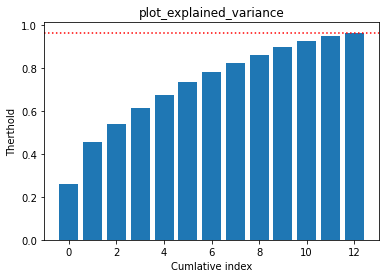

In [39]:
pca_section.plot_explained_variance()

In [40]:
data_mean = np.mean(X , axis = 0)
data_variance = np.var(X , axis =0)
data_norrmailzed = (X-data_mean)/np.sqrt(data_variance)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(data_norrmailzed)
print(pca.explained_variance_ratio_)
Cumlative_sum = pca.explained_variance_.cumsum()
index_of_ratio = 6

[0.26013741 0.19398937 0.08353155 0.0770953  0.06036567 0.05798774
 0.04870506 0.04146732 0.03683556 0.03490864 0.02892084 0.02237816
 0.01666276]


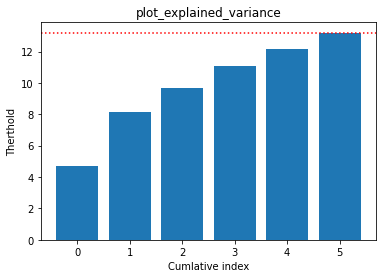

In [41]:
plt.bar( np.arange(index_of_ratio) , Cumlative_sum[0:index_of_ratio])
plt.axhline(Cumlative_sum[index_of_ratio-1], color='red', ls='dotted')
plt.xlabel("Cumlative index")
plt.ylabel("Therthold")
plt.title("plot_explained_variance")
plt.show()